# **Random Forest Algorithm**

In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import os

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [ ]:
train_original = pd.read_csv('data/train_original.csv')
train_log = pd.read_csv('data/train_log.csv')
train_smokers = pd.read_csv('data/train_smokers.csv') 
train_smokers_squared = pd.read_csv('data/train_smokers_squared.csv') 


## **Splitting the datasets**

Now that the preprocessing is done we can split the dataset into validation and train sets.

In [ ]:

X_train_original, X_validation_original, y_train_original, y_validation_original = train_test_split(train_original.drop("charges", axis=1), train_original[["charges"]], test_size=0.2, random_state=RANDOM_SEED) 
X_train_log, X_validation_log, y_train_log, y_validation_log = train_test_split(train_log.drop("charges", axis=1), train_log[["charges"]], test_size=0.2, random_state=RANDOM_SEED) 
X_train_smokers, X_validation_smokers, y_train_smokers, y_validation_smokers = train_test_split(train_smokers.drop("charges", axis=1), train_smokers[["charges"]], test_size=0.2, random_state=RANDOM_SEED)
X_train_smokers_squared, X_validation_smokers_squared, y_train_smokers_squared, y_validation_smokers_squared = train_test_split(train_smokers_squared.drop("charges", axis=1), train_smokers_squared[["charges"]], test_size=0.2, random_state=RANDOM_SEED)

# **Original dataset**

First we train the model on the original datasets. We chose 3 different algorithms for each dataset, Linear regression, Random forest and XGboost

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(train_original.drop("charges", axis=1), train_original[["charges"]], test_size=0.2, random_state=RANDOM_SEED) # create training and validation sets

## **Linear Regression**

In [ ]:
lr = LinearRegression() # create linear regression object
lr.fit(X_train, y_train) # train model on training set

y_predictions = lr.predict(X_validation) # predict on validation set
mse = root_mean_squared_error(y_validation, y_predictions)
rmse = np.sqrt(mse) # calculate root mean squared error
mae = mean_absolute_error(y_validation, y_predictions) # calculate mean absolute error

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 81.28003055657507
MAE: 4482.695790334958


<function matplotlib.pyplot.show(close=None, block=None)>

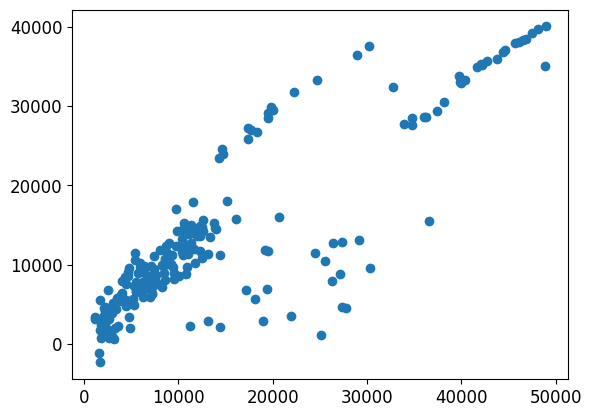

In [234]:
plt.plot(y_validation, y_predictions, 'o')
plt.show

## **Random Forest**

## **Training the model**


In [ ]:
rf = RandomForestRegressor() # create random forest regression object
rf.fit(X_train, y_train) # train model on training set

y_predictions = rf.predict(X_validation) 
mse = root_mean_squared_error(y_validation, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

c:\Cours\UiS\Introduction to Data Science\Project\Project-Group-3\venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RMSE: 73.7915340673955
MAE: 2830.5797444881173


<function matplotlib.pyplot.show(close=None, block=None)>

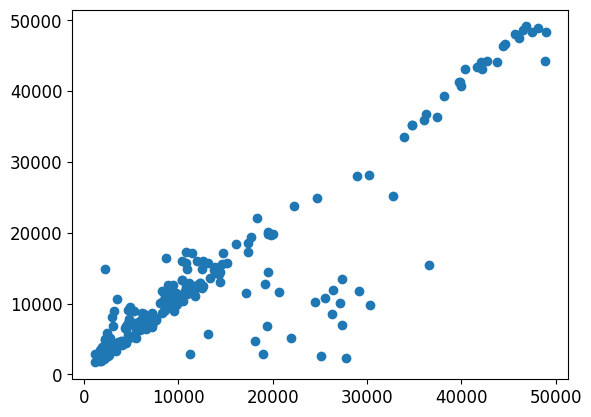

In [236]:
plt.plot(y_validation, y_predictions, 'o')
plt.show

We use Gridsearch to search for the best parameters to use in training the model.

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
} # create parameter grid
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring={'mae': 'neg_mean_absolute_error', 'rmse': 'neg_root_mean_squared_error'}, refit='rmse') # create grid search object
grid_search.fit(X_train, y_train) # train grid search

print(grid_search.best_params_) 

c:\Cours\UiS\Introduction to Data Science\Project\Project-Group-3\venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Cours\UiS\Introduction to Data Science\Project\Project-Group-3\venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Cours\UiS\Introduction to Data Science\Project\Project-Group-3\venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Cours\UiS\Introduction to Data Science\Project\Project-

{'max_depth': 10, 'n_estimators': 200}


In [ ]:
best_rf = grid_search.best_estimator_ # get best model
y_predictions = best_rf.predict(X_validation) 
mse = root_mean_squared_error(y_validation, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 74.01680724513291
MAE: 2879.891591587318


## **XGBoost**

### **Training the data**

In [239]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

y_predictions = xgb.predict(X_validation)
mse = root_mean_squared_error(y_validation, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 76.95296007393137
MAE: 3316.258367453089


<function matplotlib.pyplot.show(close=None, block=None)>

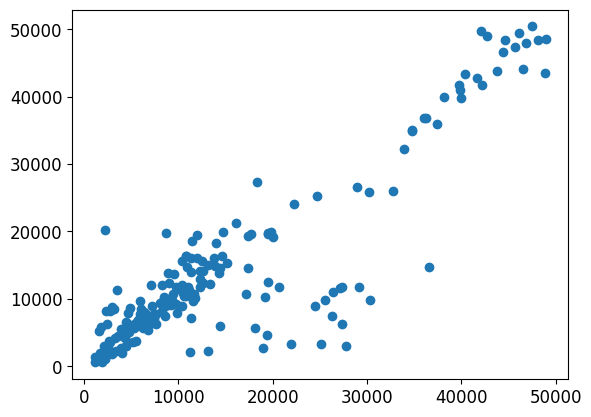

In [240]:
plt.plot(y_validation, y_predictions, 'o')
plt.show

In [ ]:
param_grid = {
    'max_depth': [None, 3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.2, 0.3]
} 
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring={'mae': 'neg_mean_absolute_error', 'rmse': 'neg_root_mean_squared_error'}, refit='rmse')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'learning_rate': 0.05, 'max_depth': 3}


In [ ]:
best_xgb = grid_search.best_estimator_
y_predictions = best_xgb.predict(X_validation)
mse = root_mean_squared_error(y_validation, y_predictions)
mae = mean_absolute_error(y_validation, y_predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 72.72080195662286
MAE: 2918.343730474226


From the results we can see that the XGBoost model performs the best if we choose RMSE as the main metric. We create a dictionary to store the models and save the XBgoost model for the original dataset.

In [ ]:
os.makedirs('data/models', exist_ok=True) 
joblib.dump(best_xgb, 'data/models/best_model_original.pkl') 

['data/models/best_model_original.pkl']

# **Log dataset**

In [244]:
X_train, X_validation, y_train, y_validation = train_test_split(train_log.drop("charges", axis=1), train_log[["charges"]], test_size=0.2, random_state=RANDOM_SEED)

## **Linear Regression**

In [245]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_predictions = lr.predict(X_validation)
mse = root_mean_squared_error(y_validation, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 0.7036701763199256
MAE: 0.296346796792894


<function matplotlib.pyplot.show(close=None, block=None)>

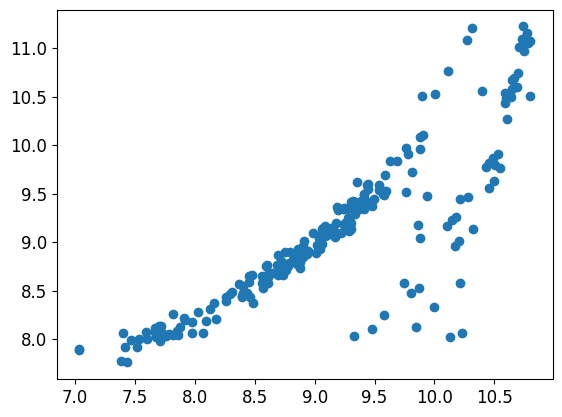

In [246]:
plt.plot(y_validation, y_predictions, 'o')
plt.show

## **Random Forest**

## **Training the model**


In [ ]:
rf = RandomForestRegressor() # create random forest regression object
rf.fit(X_train, y_train) # train model on training set

y_predictions = rf.predict(X_validation) # predict on validation set
mse = root_mean_squared_error(y_validation, y_predictions) 
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

c:\Cours\UiS\Introduction to Data Science\Project\Project-Group-3\venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RMSE: 0.6820590639981636
MAE: 0.22818821073875725


<function matplotlib.pyplot.show(close=None, block=None)>

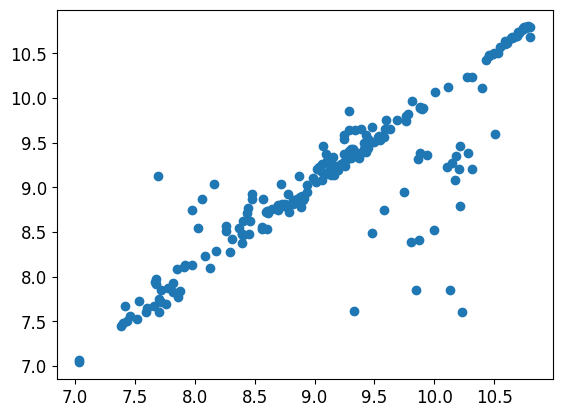

In [248]:
plt.plot(y_validation, y_predictions, 'o')
plt.show

In [249]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring={'mae': 'neg_mean_absolute_error', 'rmse': 'neg_root_mean_squared_error'}, refit='rmse')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

c:\Cours\UiS\Introduction to Data Science\Project\Project-Group-3\venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Cours\UiS\Introduction to Data Science\Project\Project-Group-3\venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Cours\UiS\Introduction to Data Science\Project\Project-Group-3\venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Cours\UiS\Introduction to Data Science\Project\Project-

{'max_depth': 10, 'n_estimators': 300}


In [250]:
best_rf = grid_search.best_estimator_
y_predictions = best_rf.predict(X_validation)
mse = root_mean_squared_error(y_validation, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 0.6805011357930228
MAE: 0.23184766035467744


## **XGBoost**

### **Training the data**

In [251]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

y_predictions = xgb.predict(X_validation)
mse = root_mean_squared_error(y_validation, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 0.7083634518849078
MAE: 0.256499415611508


<function matplotlib.pyplot.show(close=None, block=None)>

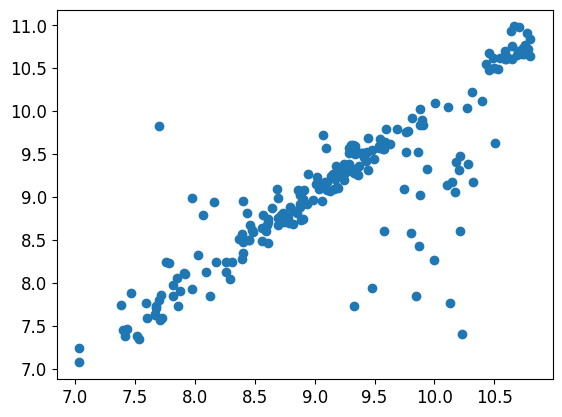

In [252]:
plt.plot(y_validation, y_predictions, 'o')
plt.show

In [253]:
param_grid = {
    'max_depth': [None, 3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.2, 0.3]
}
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring={'mae': 'neg_mean_absolute_error', 'rmse': 'neg_root_mean_squared_error'}, refit='rmse')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'learning_rate': 0.05, 'max_depth': 3}


In [254]:
best_xgb = grid_search.best_estimator_
y_predictions = best_xgb.predict(X_validation)
mse = root_mean_squared_error(y_validation, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 0.6659961426967715
MAE: 0.22941918181260762


From the results of the logarithmic values the XGBoost algorithm performs the best. We save this model to the directory.

In [255]:
joblib.dump(best_xgb, 'data/models/best_model_log.pkl')

['data/models/best_model_log.pkl']

# **Smokers dataset**

In [256]:
X_train, X_validation, y_train, y_validation = train_test_split(train_smokers.drop("charges", axis=1), train_smokers[["charges"]], test_size=0.2, random_state=RANDOM_SEED)

## **Linear Regression**

In [257]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_predictions = lr.predict(X_validation)
mse = root_mean_squared_error(y_validation, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 80.23307854205446
MAE: 5342.469560396086


<function matplotlib.pyplot.show(close=None, block=None)>

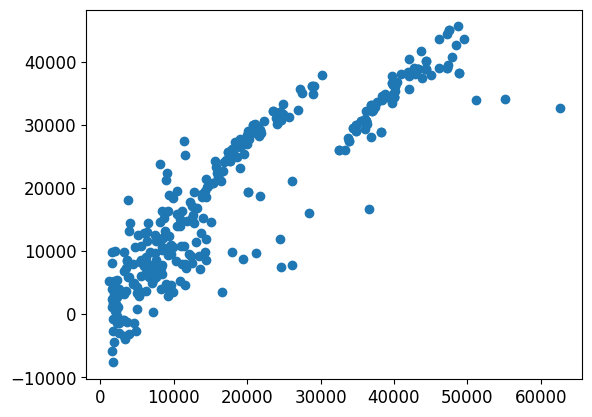

In [258]:
plt.plot(y_validation, y_predictions, 'o')
plt.show

## **Random Forest**

## **Training the model**


In [259]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_predictions = rf.predict(X_validation)
mse = root_mean_squared_error(y_validation, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

c:\Cours\UiS\Introduction to Data Science\Project\Project-Group-3\venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RMSE: 57.40413862762239
MAE: 1462.5789493180177


<function matplotlib.pyplot.show(close=None, block=None)>

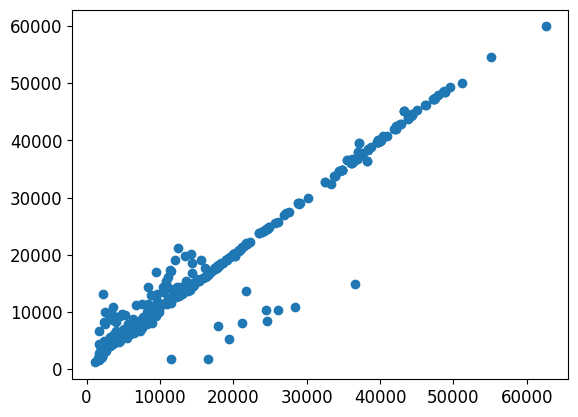

In [260]:
plt.plot(y_validation, y_predictions, 'o')
plt.show

In [261]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring={'mae': 'neg_mean_absolute_error', 'rmse': 'neg_root_mean_squared_error'}, refit='rmse')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

c:\Cours\UiS\Introduction to Data Science\Project\Project-Group-3\venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Cours\UiS\Introduction to Data Science\Project\Project-Group-3\venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Cours\UiS\Introduction to Data Science\Project\Project-Group-3\venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Cours\UiS\Introduction to Data Science\Project\Project-

{'max_depth': 10, 'n_estimators': 200}


In [262]:
best_rf = grid_search.best_estimator_
y_predictions = best_rf.predict(X_validation)
mse = root_mean_squared_error(y_validation, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 56.596270348955095
MAE: 1443.7342309683045


## **XGBoost**

### **Training the data**

In [263]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

y_predictions = xgb.predict(X_validation)
mse = root_mean_squared_error(y_validation, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 59.285506255110164
MAE: 1529.223227280457


<function matplotlib.pyplot.show(close=None, block=None)>

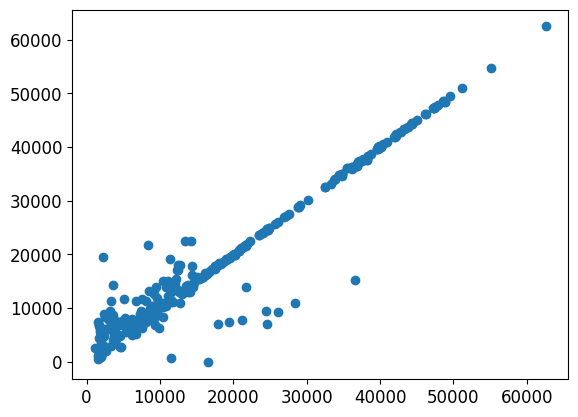

In [264]:
plt.plot(y_validation, y_predictions, 'o')
plt.show

In [265]:
param_grid = {
    'max_depth': [None, 3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.2, 0.3]
}
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring={'mae': 'neg_mean_absolute_error', 'rmse': 'neg_root_mean_squared_error'}, refit='rmse')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'learning_rate': 0.05, 'max_depth': None}


In [266]:
best_xgb = grid_search.best_estimator_
y_predictions = best_xgb.predict(X_validation)
mse = root_mean_squared_error(y_validation, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 56.22686574076234
MAE: 1577.8048615674677


When comparing the results from the dataset with oversampled number of smokers the XGboost performs best. 

In [267]:
joblib.dump(best_xgb, 'data/models/best_model_smokers.pkl')

['data/models/best_model_smokers.pkl']

# **Smokers squared dataset**

In [268]:
X_train, X_validation, y_train, y_validation = train_test_split(train_smokers_squared.drop("charges", axis=1), train_smokers_squared[["charges"]], test_size=0.2, random_state=RANDOM_SEED)

## **Linear Regression**

In [269]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_predictions = lr.predict(X_validation)
mse = root_mean_squared_error(y_validation, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 4.596558216691127
MAE: 17.230679654276283


<function matplotlib.pyplot.show(close=None, block=None)>

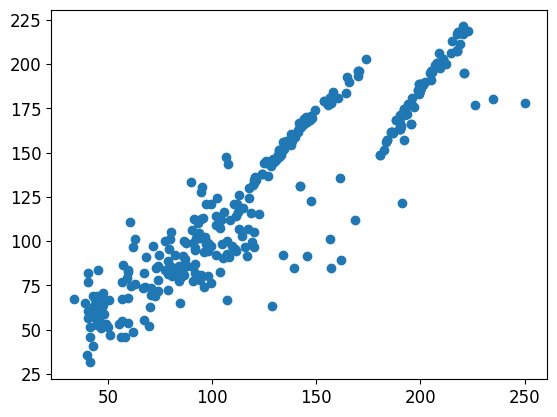

In [270]:
plt.plot(y_validation, y_predictions, 'o')
plt.show

## **Random Forest**

## **Training the model**


In [271]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_predictions = rf.predict(X_validation)
mse = root_mean_squared_error(y_validation, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

c:\Cours\UiS\Introduction to Data Science\Project\Project-Group-3\venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RMSE: 3.754555918954453
MAE: 6.041979131411361


<function matplotlib.pyplot.show(close=None, block=None)>

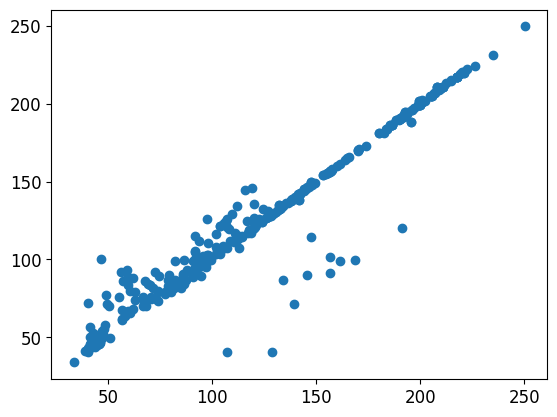

In [272]:
plt.plot(y_validation, y_predictions, 'o')
plt.show

In [273]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring={'mae': 'neg_mean_absolute_error', 'rmse': 'neg_root_mean_squared_error'}, refit='rmse')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

c:\Cours\UiS\Introduction to Data Science\Project\Project-Group-3\venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Cours\UiS\Introduction to Data Science\Project\Project-Group-3\venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Cours\UiS\Introduction to Data Science\Project\Project-Group-3\venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Cours\UiS\Introduction to Data Science\Project\Project-

{'max_depth': 10, 'n_estimators': 200}


In [274]:
best_rf = grid_search.best_estimator_
y_predictions = best_rf.predict(X_validation)
mse = root_mean_squared_error(y_validation, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 3.772495812550839
MAE: 6.231614712962756


## **XGBoost**

### **Training the data**

In [275]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

y_predictions = xgb.predict(X_validation)
mse = root_mean_squared_error(y_validation, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 4.015328906739714
MAE: 7.170436677789045


<function matplotlib.pyplot.show(close=None, block=None)>

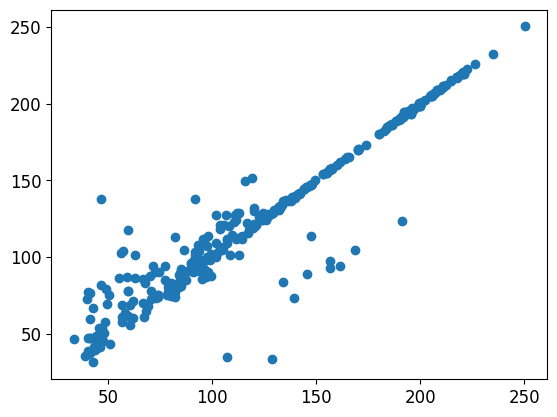

In [276]:
plt.plot(y_validation, y_predictions, 'o')
plt.show

In [277]:
param_grid = {
    'max_depth': [None, 3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.2, 0.3]
}
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring={'mae': 'neg_mean_absolute_error', 'rmse': 'neg_root_mean_squared_error'}, refit='rmse')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'learning_rate': 0.05, 'max_depth': 3}


In [278]:
best_xgb = grid_search.best_estimator_
y_predictions = best_xgb.predict(X_validation)
mse = root_mean_squared_error(y_validation, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 3.671273459157866
MAE: 7.575975422656905


Also here when we use the squared charges on the oversampled smoker dataset, the XGBoost performs the best. 

In [279]:
joblib.dump(best_xgb, 'data/models/best_model_smokers_squared.pkl')

['data/models/best_model_smokers_squared.pkl']